# Sign Language Digits

# Load Libraries

In [60]:
import tensorflow as tf
from tensorflow import keras
import matplotlib
import numpy as np

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
print('Finsihed loading libraries')

Finsihed loading libraries


# Load data

In [61]:
x = np.load('X.npy')
y = np.load('Y.npy')
print('Finsihed reading data')

Finsihed reading data


In [62]:
print(x.shape)
print(y.shape)
print(type(y))

(2062, 64, 64)
(2062, 10)
<class 'numpy.ndarray'>


In [63]:
print(type(x))
print(type(y))
x = x.reshape(2062,64 * 64)
y = np.argmax(y, axis= 1)
print(type(y))
print(y.shape)

#convert the y into a 1D

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2062,)


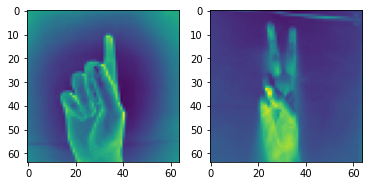

Finished


In [64]:
plt.subplot(1, 2, 1)
plt.imshow(x[380].reshape(64, 64))
plt.axis('on')
plt.subplot(1, 2, 2)
plt.imshow(x[600].reshape(64, 64))
plt.axis('on')
plt.show()
print("Finished")

# Multinomial Logistic Regression Baseline Model 

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1649, 4096)
(1649,)
(413, 4096)
(413,)


In [66]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=4100)
softmax_reg.fit(x_train, y_train)

LogisticRegression(max_iter=4100, multi_class='multinomial')

In [67]:
print( softmax_reg.score(x_test, y_test) )
print( softmax_reg.score(x_train, y_train) )

0.738498789346247
1.0


In [68]:
from sklearn.metrics import accuracy_score
y_pred = softmax_reg.predict(x_test)
accVal = accuracy_score(y_test, y_pred)
print(accVal)

0.738498789346247


# TensorFlow / Keras  - Neural Network Model

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [70]:
#initialize the model
model = keras.models.Sequential()
print("Initialized model")

Initialized model


In [71]:
#set the input layer
model.add(keras.layers.Flatten(input_shape=[64, 64]))
print('Finsihed setting the input layer')

Finsihed setting the input layer


In [72]:
#model.add(keras.layers.Dense( 64, activation='relu', input_shape=(784,) ))
model.add(keras.layers.Dense( 64, activation='relu'))
print("Added hidden layer 1")

Added hidden layer 1


In [73]:
model.add(keras.layers.Dense(64, activation="relu"))
print('Added hidden layer 2')

Added hidden layer 2


In [74]:
model.add(keras.layers.Dense(64, activation="relu"))
print('Added hidden layer 3')

Added hidden layer 3


In [75]:
model.add(keras.layers.Dense(10, activation='softmax'))
print("Added output layer")

Added output layer


In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 271,178
Trainable params: 271,178
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", 
              metrics = ['accuracy'])
print("Finished compiling")

Finished compiling


In [78]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", 
              metrics = ['accuracy'])
print("Finished compiling")

Finished compiling


In [79]:
print(x_train.shape)
print(y_train.shape)

(1443, 4096)
(1443,)


In [80]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
print("Finished categorizing the labels (output)")

Finished categorizing the labels (output)


In [81]:
print(y_train_categorical.shape)

(1443, 10)


In [82]:
# Train the model.
history = model.fit(
  x_train,
  y_train_categorical,
  epochs=30,
  batch_size=32,
  verbose=True
)

Epoch 1/30
46/46 [==============================] - 0s 2ms/step - loss: 2.2904 - accuracy: 0.1317
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 2.2387 - accuracy: 0.1642
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 2.1936 - accuracy: 0.2308
Epoch 4/30
46/46 [==============================] - 0s 1ms/step - loss: 2.0971 - accuracy: 0.3216
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 1.9992 - accuracy: 0.3389
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 1.8671 - accuracy: 0.3770
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 1.7734 - accuracy: 0.3971
Epoch 8/30
46/46 [==============================] - 0s 2ms/step - loss: 1.7212 - accuracy: 0.4068
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 1.6673 - accuracy: 0.4283
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 1.4868 - accuracy: 0.5121
Epoch 11/30
46/46 [

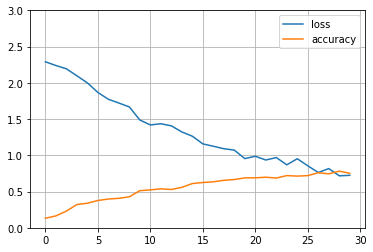

In [83]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 3) # set the vertical range to [0-1]
plt.show()

In [84]:
#evaluate
model.evaluate(
  x_test,
  to_categorical(y_test)
)

20/20 [==============================] - 0s 825us/step - loss: 1.0091 - accuracy: 0.6543


[1.009062647819519, 0.6542810797691345]

In [85]:
print(y_test.shape)

(619,)


In [86]:
# Predict on the first 8 test images.
predictions = model.predict(x_test[0:9])
print(predictions)

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print("Check the truth")
print(y_test[0:9]) 

[[2.36841710e-03 2.98361720e-05 2.46233423e-04 2.56785515e-05
  8.59181464e-01 3.96042764e-02 4.54340763e-02 1.59008540e-02
  3.20338905e-02 5.17523289e-03]
 [7.27535225e-03 1.04149757e-02 6.42537931e-03 3.30184441e-04
  6.51170835e-02 5.65176224e-03 1.27854962e-02 4.83255386e-01
  4.07525063e-01 1.21936039e-03]
 [2.64312723e-03 9.62907798e-04 6.06083020e-04 3.92176080e-05
  3.66972417e-01 7.89707806e-03 1.38451308e-02 5.48630595e-01
  5.67846745e-02 1.61882222e-03]
 [1.55783712e-03 5.82756067e-04 4.30824142e-03 1.78893373e-04
  2.15584934e-01 2.28934586e-02 6.91819936e-02 7.11379051e-02
  6.11667156e-01 2.90673506e-03]
 [2.07799370e-03 8.00103808e-05 6.38142046e-06 3.46576655e-03
  2.06367881e-03 7.35465407e-01 1.20400415e-04 4.53586079e-04
  8.02390929e-03 2.48242795e-01]
 [5.22286491e-03 1.98311154e-05 4.24580285e-05 3.61047278e-04
  3.19696665e-02 9.25303280e-01 1.69928349e-03 1.12300680e-03
  2.47572791e-02 9.50137246e-03]
 [2.11928084e-01 4.69636434e-04 9.31021350e-04 5.04597447e

In [87]:
from sklearn.metrics import classification_report 
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        67
           1       0.97      0.48      0.65        64
           2       0.53      0.36      0.43        66
           3       0.97      0.61      0.75        59
           4       0.52      0.81      0.63        62
           5       0.57      0.93      0.71        59
           6       0.51      0.78      0.61        63
           7       0.64      0.75      0.69        68
           8       0.69      0.73      0.71        56
           9       1.00      0.33      0.49        55

    accuracy                           0.65       619
   macro avg       0.73      0.65      0.65       619
weighted avg       0.72      0.65      0.65       619

